# Outliers

In [10]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data= pd.DataFrame({
    "Study_Hours":[1,2,3,4,5,6,7,8,20]
})
data

,Study_Hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [12]:
data.describe()

,Study_Hours
count,9.000000
mean,6.222222
std,5.651942
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,20.000000


# IQR Method

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
outliners=data[(data<(LB))|(data>(UB))]

In [14]:
outliners

,Study_Hours
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,20.0


# Z-Score method

In [ ]:
Z-Score method is a stat technique that detects outliner based on how far a data point is form the mean, measured in terms of standard deviantion. 
it assumes the data follow a normal distribution 
* A point with a very high or low Z-Score is flagged as an outlier because it lies in the extreme tails of the distribution 
formula
---------
z=(x-mean)/standard deviation

In [ ]:
why threshold:
Z>3: very strict(large data sets)
Z>2: practical for small datasets.

In [15]:
data= pd.DataFrame({
    "Study_Hours":[1,2,3,4,5,6,7,8,20]
})
data

,Study_Hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [17]:
z_scores= np.abs(stats.zscore(data["Study_Hours"]))
outliers= data[z_scores>2]
outliers

,Study_Hours
8,20


In [18]:
stats.zscore(data["Study_Hours"])

array([-0.98001775, -0.79235477, -0.6046918 , -0.41702883, -0.22936586,
       -0.04170288,  0.14596009,  0.33362306,  2.58557873])

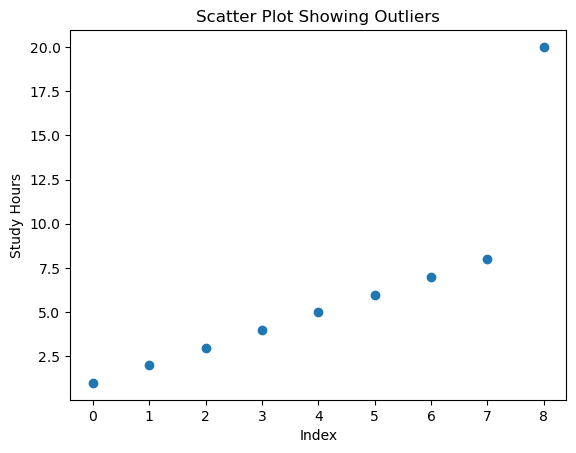

In [26]:
plt.scatter(range(len(data)),data["Study_Hours"])
plt.xlabel("Index")
plt.ylabel("Study Hours")
plt.title("Scatter Plot Showing Outliers")
plt.show()

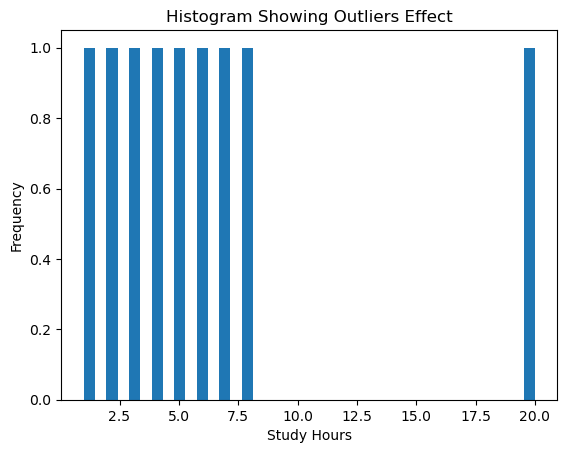

In [27]:
plt.hist(data["Study_Hours"],bins=40)
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.title("Histogram Showing Outliers Effect")
plt.show()